In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
from sklearn.datasets import load_iris

In [56]:
iris = load_iris()

In [57]:
x = iris.data
y = iris.target

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [60]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [61]:
#用隨機森林建模挑變數
select = SelectFromModel(RandomForestClassifier(n_estimators=100))
select.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [62]:
#結果顯示後兩個變數的重要性較高
select.get_support()

array([False, False,  True,  True])

In [63]:
#把X換成後兩個變數
X = x[:, 2:5]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [65]:
from sklearn.svm import SVC

### Step1. 開一台函數學習機

In [66]:
clf = SVC(gamma="auto")

### Step2. 訓練

In [67]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
y_predict = clf.predict(X_test)

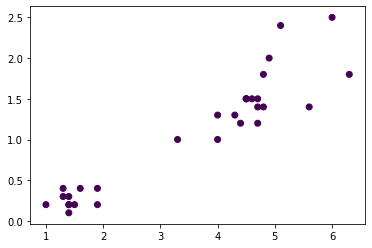

In [81]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_predict-y_test)

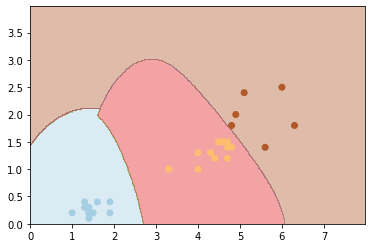

In [97]:
x0 = np.arange(0, 8, 0.02)
y0 = np.arange(0, 4, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap="Paired", alpha=0.4)

plt.scatter(X_test[:,0], X_test[:,1], cmap="Paired", 
           c= y_test)